# prepare `cellranger multi` run

In [6]:
import pandas as pd
df = pd.read_excel(
    '../cr_resources/hiv/Stary SSHIV35_10x_RNA_sample_annotation_sheet-2.xlsx',
    sheet_name = 'Libraries',
    usecols = [2, 3, 9, 10],
    nrows = 42
)
df['sample_id'] = df['Sample Name'].apply(
    lambda x: '_'.join(x.split('_')[:2])
)
df['library_name'] = df['Sample Name'].apply(
    lambda x: '_'.join(x.split('_')[2:])
)
df = df.loc[df.library_name.isin(['blood', 'skin']), :]
df

/users/daniel.malzl/.conda/envs/scpython/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Library Label,Sample Name,Hashtag Primer Name,Hashtag Primer Sequence,sample_id,library_name
0,SSHIV35,SSHIV35_1_blood,Hashtag 1: Total-Seq-C0251 Cat: 394661,GTCAACTCTTTAGCG,SSHIV35_1,blood
1,SSHIV35,SSHIV35_2_blood,Hashtag 1: Total-Seq-C0251 Cat: 394661,GTCAACTCTTTAGCG,SSHIV35_2,blood
2,SSHIV35,SSHIV35_3_blood,Hashtag 1: Total-Seq-C0251 Cat: 394661,GTCAACTCTTTAGCG,SSHIV35_3,blood
3,SSHIV35,SSHIV35_4_blood,Hashtag 1: Total-Seq-C0251 Cat: 394661,GTCAACTCTTTAGCG,SSHIV35_4,blood
4,SSHIV35,SSHIV35_5_blood,Hashtag 1: Total-Seq-C0251 Cat: 394661,GTCAACTCTTTAGCG,SSHIV35_5,blood
5,SSHIV35,SSHIV35_6_blood,Hashtag 1: Total-Seq-C0251 Cat: 394661,GTCAACTCTTTAGCG,SSHIV35_6,blood
6,SSHIV35,SSHIV35_7_blood,Hashtag 3: Total-Seq-C0251 Cat: 394665,TTCCGCCTCTCTTTG,SSHIV35_7,blood
21,SSHIV35,SSHIV35_1_skin,Hashtag 3: Total-Seq-C0251 Cat: 394665,TTCCGCCTCTCTTTG,SSHIV35_1,skin
22,SSHIV35,SSHIV35_2_skin,Hashtag 2: Total-Seq-C0252 Cat: 394663,TGATGGCCTATTGGG,SSHIV35_2,skin
23,SSHIV35,SSHIV35_3_skin,Hashtag 2: Total-Seq-C0252 Cat: 394663,TGATGGCCTATTGGG,SSHIV35_3,skin


In [7]:
ab_map = {
    'Hashtag 1': 'AB0251',
    'Hashtag 2': 'AB0252',
    'Hashtag 3': 'AB0253',
    'Hashtag 4': 'AB0254'
}

df['ab_id'] = df['Hashtag Primer Name'].apply(
    lambda x: ab_map[x.split(':')[0]]
)
df

,Library Label,Sample Name,Hashtag Primer Name,Hashtag Primer Sequence,sample_id,library_name,ab_id
0,SSHIV35,SSHIV35_1_blood,Hashtag 1: Total-Seq-C0251 Cat: 394661,GTCAACTCTTTAGCG,SSHIV35_1,blood,AB0251
1,SSHIV35,SSHIV35_2_blood,Hashtag 1: Total-Seq-C0251 Cat: 394661,GTCAACTCTTTAGCG,SSHIV35_2,blood,AB0251
2,SSHIV35,SSHIV35_3_blood,Hashtag 1: Total-Seq-C0251 Cat: 394661,GTCAACTCTTTAGCG,SSHIV35_3,blood,AB0251
3,SSHIV35,SSHIV35_4_blood,Hashtag 1: Total-Seq-C0251 Cat: 394661,GTCAACTCTTTAGCG,SSHIV35_4,blood,AB0251
4,SSHIV35,SSHIV35_5_blood,Hashtag 1: Total-Seq-C0251 Cat: 394661,GTCAACTCTTTAGCG,SSHIV35_5,blood,AB0251
5,SSHIV35,SSHIV35_6_blood,Hashtag 1: Total-Seq-C0251 Cat: 394661,GTCAACTCTTTAGCG,SSHIV35_6,blood,AB0251
6,SSHIV35,SSHIV35_7_blood,Hashtag 3: Total-Seq-C0251 Cat: 394665,TTCCGCCTCTCTTTG,SSHIV35_7,blood,AB0253
21,SSHIV35,SSHIV35_1_skin,Hashtag 3: Total-Seq-C0251 Cat: 394665,TTCCGCCTCTCTTTG,SSHIV35_1,skin,AB0253
22,SSHIV35,SSHIV35_2_skin,Hashtag 2: Total-Seq-C0252 Cat: 394663,TGATGGCCTATTGGG,SSHIV35_2,skin,AB0252
23,SSHIV35,SSHIV35_3_skin,Hashtag 2: Total-Seq-C0252 Cat: 394663,TGATGGCCTATTGGG,SSHIV35_3,skin,AB0252


In [3]:
hto_cmo_ref = {}
with open('../cr_resources/hto_cmo_ref_totalseqC.csv') as f:
    header = f.readline()
    for line in f:
        line = line.split(',')
        k = line[0]
        line[1] = '{name}'
        hto_cmo_ref[k] = ','.join(line)
        print(','.join(line))
        
hto_cmo_ref, header

AB0251,{name},R2,5PNNNNNNNNNN(BC),GTCAACTCTTTAGCG,Antibody Capture

AB0252,{name},R2,5PNNNNNNNNNN(BC),TGATGGCCTATTGGG,Antibody Capture

AB0253,{name},R2,5PNNNNNNNNNN(BC),TTCCGCCTCTCTTTG,Antibody Capture

AB0254,{name},R2,5PNNNNNNNNNN(BC),AGTAAGTTCAGCGTA,Antibody Capture



({'AB0251': 'AB0251,{name},R2,5PNNNNNNNNNN(BC),GTCAACTCTTTAGCG,Antibody Capture\n',
  'AB0252': 'AB0252,{name},R2,5PNNNNNNNNNN(BC),TGATGGCCTATTGGG,Antibody Capture\n',
  'AB0253': 'AB0253,{name},R2,5PNNNNNNNNNN(BC),TTCCGCCTCTCTTTG,Antibody Capture\n',
  'AB0254': 'AB0254,{name},R2,5PNNNNNNNNNN(BC),AGTAAGTTCAGCGTA,Antibody Capture\n'},
 'id,name,read,pattern,sequence,feature_type\n')

In [4]:
cmo_refs_sample = {}
for pvid, sample_df in df.groupby('sample_id'):
    tmp = sample_df.loc[
        :,
        ['ab_id', 'library_name']
    ].drop_duplicates()
    k = ','.join(tmp.apply(lambda x: ':'.join(x), axis = 1))
    if not k in cmo_refs_sample:
        cmo_refs_sample[k] = set([pvid])
    
    else:
        cmo_refs_sample[k].add(pvid)

cmo_refs_sample

{'AB0251:blood,AB0253:skin': {'SSHIV35_1'},
 'AB0251:blood,AB0252:skin': {'SSHIV35_2',
  'SSHIV35_3',
  'SSHIV35_4',
  'SSHIV35_5',
  'SSHIV35_6'},
 'AB0253:blood,AB0254:skin': {'SSHIV35_7'}}

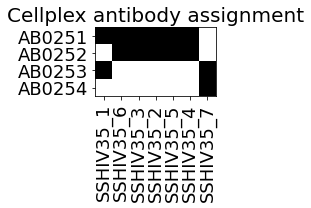

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
a = np.zeros((4, 7))
idx = {
    'AB0251': 0,
    'AB0252': 1,
    'AB0253': 2,
    'AB0254': 3
}
samples = []
j = 0
for k, v in cmo_refs_sample.items():
    for sample in v:
        samples.append(sample)
        for cmo in k.split(','):
            a[idx[cmo.split(':')[0]], j] = 1
        
        j += 1
        
ax.imshow(a, vmin = 0, vmax = 1, cmap = 'Greys')
ax.set_yticks(range(4))
ax.set_yticklabels([k for k in idx], fontsize = 18)
ax.set_xticks(range(len(samples)))
ax.set_xticklabels(samples, rotation = 90, fontsize = 18)
ax.set_title('Cellplex antibody assignment', fontsize = 20)
fig.set_figheight(3)
fig.set_figwidth(20)
fig.tight_layout()

In [5]:
cmo_refs_sample.items()

dict_items([('AB0251:blood,AB0253:skin', {'SSHIV35_1'}), ('AB0251:blood,AB0252:skin', {'SSHIV35_4', 'SSHIV35_2', 'SSHIV35_5', 'SSHIV35_3', 'SSHIV35_6'}), ('AB0253:blood,AB0254:skin', {'SSHIV35_7'})])

In [6]:
import glob
import os

file_assignments = []
resource_dir = 'hiv'
for i, (k, v) in enumerate(cmo_refs_sample.items()):
    cmos = k.split(',')
    hto_cmo_ref_content = header
    for cmo, name in [cmo.split(':') for cmo in cmos]:
        hto_cmo_ref_content += hto_cmo_ref[cmo].format(name = name)
    
    hto_cmo_ref_file = f'hto_cmo_ref_{i}.csv'
    with open(f'../cr_resources/{resource_dir}/{hto_cmo_ref_file}', 'w') as f:
        f.write(hto_cmo_ref_content)

    base_dir = '/scratch-cbe/users/daniel.malzl/scanalysis'
    for pvid in v:
        gex_lib_dir = f'{base_dir}/fastqs_hiv/{pvid}_Transcriptome'
        mux_lib_dir = f'{base_dir}/fastqs_hiv/{pvid}_Antibody_Multiplex'
        gex_data = glob.glob(f'{gex_lib_dir}/*')
        mux_data = glob.glob(f'{mux_lib_dir}/*')
        
        data_paths = {}
        for data_type, data_files in zip(
            ['gex', 'mux'],
            [gex_data, mux_data]
        ):
            directory = f'{base_dir}/hiv_data/{pvid}_{data_type}'
            if not os.path.exists(directory):
                os.mkdir(directory)
            
            data_paths[data_type] = directory
                
            for source in data_files:
                basename = os.path.basename(source)
                suffix = '_'.join(basename.split('_')[-4:])
                destination = f'{directory}/{pvid}_{data_type}_{suffix}'
                
                if not os.path.exists(destination):
                    os.symlink(
                        source,
                        destination
                    )
        
        libraries_header = 'fastqs,sample,library_type\n'
        gex_lib_line = f'{base_dir}/hiv_data/{pvid}_gex,{pvid}_gex,Gene Expression\n'
        mux_lib_line = f'{base_dir}/hiv_data/{pvid}_mux,{pvid}_mux,Antibody Capture'
        libraries_file_name = f'hto_demux_config_{pvid}.csv'
        with open(f'../cr_resources/{resource_dir}/{libraries_file_name}', 'w') as f:
            for line in [libraries_header, gex_lib_line, mux_lib_line]:
                f.write(line)
            
        file_assignments.append(
            [pvid, hto_cmo_ref_file, libraries_file_name]
        )

with open(f'../cr_resources/{resource_dir}/sample_hto_demux.csv', 'w') as f:
    f.write(
        '\n'.join(
            [','.join(l) for l in file_assignments]
        )
    )
file_assignments

[['SSHIV35_1', 'hto_cmo_ref_0.csv', 'hto_demux_config_SSHIV35_1.csv'],
 ['SSHIV35_4', 'hto_cmo_ref_1.csv', 'hto_demux_config_SSHIV35_4.csv'],
 ['SSHIV35_2', 'hto_cmo_ref_1.csv', 'hto_demux_config_SSHIV35_2.csv'],
 ['SSHIV35_5', 'hto_cmo_ref_1.csv', 'hto_demux_config_SSHIV35_5.csv'],
 ['SSHIV35_3', 'hto_cmo_ref_1.csv', 'hto_demux_config_SSHIV35_3.csv'],
 ['SSHIV35_6', 'hto_cmo_ref_1.csv', 'hto_demux_config_SSHIV35_6.csv'],
 ['SSHIV35_7', 'hto_cmo_ref_2.csv', 'hto_demux_config_SSHIV35_7.csv']]

In [9]:
len(file_assignments)

7

# aggregate data
aggr did not work for whatever reason but we anyway have the filtered data so we do it manually using scanpy. run after `cellranger count` and demultiplexing with `counhto`

In [8]:
import gzip
import os

import anndata as ad
import pandas as pd

from scipy.io import mmread


def read_demultiplex_data(
    matrix_file, 
    barcodes_file, 
    features_file, 
    demux_barcodes_files, 
    additional_metadata,
    barcode_suffix = ''
):
    with gzip.open(matrix_file, 'rt') as mtx_file:
        mtx = mmread(mtx_file).T
        
    barcodes = pd.read_csv(
        barcodes_file,
        header=None,
        index_col=0,
        compression='gzip'
    )
    features = pd.read_csv(
        features_file,
        sep='\t',
        header=None,
        index_col=0,
        usecols=[0, 1],
        names=['gene_id', 'gene_name'],
        compression='gzip'
    )
    demux_info = pd.read_csv(
        demux_barcodes_files,
        sep='\t',
        index_col=0
    )
    demux_info.index = demux_info.index.values
    for column, metadata in additional_metadata.items():
        demux_info[column] = metadata
        
    demux_info = demux_info.reindex(barcodes.index)
    
    if barcode_suffix:
        demux_info.index = [i + barcode_suffix for i in demux_info.index]
        
    genes = ~features.index.str.startswith('AB')
    adata = ad.AnnData(
        X = mtx.tocsr()[:, genes],
        obs = demux_info,
        var = features.loc[genes, :]
    )
    return adata
        
    
data_dir = '/scratch-cbe/users/daniel.malzl/scanalysis/{sample_id}'
matrix_file = 'outs/filtered_feature_bc_matrix/matrix.mtx.gz'
barcodes_file = 'outs/filtered_feature_bc_matrix/barcodes.tsv.gz'
features_file = 'outs/filtered_feature_bc_matrix/features.tsv.gz'
demux_file = 'hto_demux_matrix/barcodes.tsv'

adatas = []
for i, sample_id in enumerate(df.sample_id.unique()):
    sample_data_dir = data_dir.format(sample_id=sample_id)
    print(sample_id)
    adatas.append(
        read_demultiplex_data(
            os.path.join(sample_data_dir, matrix_file),
            os.path.join(sample_data_dir, barcodes_file),
            os.path.join(sample_data_dir, features_file),
            os.path.join(sample_data_dir, demux_file),
            {'sample_id': sample_id, 'patient_id': sample_id},
            str(i)
        )
    )
    
adata = ad.concat(adatas)
adata

SSHIV35_1


/tmp/ipykernel_42268/1542912964.py:51: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(


SSHIV35_2


/tmp/ipykernel_42268/1542912964.py:51: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(


SSHIV35_3


/tmp/ipykernel_42268/1542912964.py:51: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(


SSHIV35_4


/tmp/ipykernel_42268/1542912964.py:51: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(


SSHIV35_5


/tmp/ipykernel_42268/1542912964.py:51: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(


SSHIV35_6


/tmp/ipykernel_42268/1542912964.py:51: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(


SSHIV35_7


/tmp/ipykernel_42268/1542912964.py:51: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(


AnnData object with n_obs × n_vars = 30170 × 33538
    obs: 'num_features', 'feature_call', 'num_umis', 'sample_id', 'patient_id'

In [3]:
features = pd.read_csv(
    os.path.join(sample_data_dir, features_file),
    sep='\t',
    compression='gzip',
    usecols=[0, 1],
    index_col=0,
    names=['gene_id', 'gene_name']
)
adata.var = adata.var.merge(
    features,
    left_index=True,
    right_index=True,
    how='left'
)
adata.var

,gene_name
gene_id,
ENSG00000243485,MIR1302-2HG
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000238009,AL627309.1
ENSG00000239945,AL627309.3
...,...
ENSG00000277856,AC233755.2
ENSG00000275063,AC233755.1
ENSG00000271254,AC240274.1


In [4]:
adata.obs

,num_features,feature_call,num_umis,sample_id,patient_id
AAACCTGAGGCTCTTA-10,1.0,blood,752,SSHIV35_1,SSHIV35_1
AAACCTGAGGTAAACT-10,1.0,blood,347,SSHIV35_1,SSHIV35_1
AAACCTGAGGTGTTAA-10,1.0,skin,590,SSHIV35_1,SSHIV35_1
AAACCTGAGTGGTAGC-10,0.0,Negative,74|15,SSHIV35_1,SSHIV35_1
AAACCTGAGTGTCCCG-10,0.0,Negative,55|7,SSHIV35_1,SSHIV35_1
...,...,...,...,...,...
TTTGTCAGTTGACGTT-16,1.0,blood,663,SSHIV35_7,SSHIV35_7
TTTGTCATCCGGCACA-16,1.0,blood,470,SSHIV35_7,SSHIV35_7
TTTGTCATCGTCTGAA-16,1.0,blood,503,SSHIV35_7,SSHIV35_7
TTTGTCATCTTCGGTC-16,1.0,blood,452,SSHIV35_7,SSHIV35_7


In [5]:
adata.write(
    '../raw/hiv.h5ad'
)

In [9]:
import scanpy as sc
adata2 = sc.read_10x_mtx(
    '/scratch-cbe/users/daniel.malzl/scanalysis/SSHIV35_1/outs/filtered_feature_bc_matrix',
    gex_only = False
)

In [9]:
ps_pbmc = read_demultiplex_data(
    '/scratch-cbe/users/daniel.malzl/scanalysis/BSF_1113_Treg_blood_1/outs/filtered_feature_bc_matrix/matrix.mtx.gz',
    '/scratch-cbe/users/daniel.malzl/scanalysis/BSF_1113_Treg_blood_1/outs/filtered_feature_bc_matrix/barcodes.tsv.gz',
    '/scratch-cbe/users/daniel.malzl/scanalysis/BSF_1113_Treg_blood_1/outs/filtered_feature_bc_matrix/features.tsv.gz',
    '/scratch-cbe/users/daniel.malzl/scanalysis/BSF_1113_Treg_blood_1/hto_demux_matrix/barcodes.tsv',
    {}
)
ps_pbmc.obs.index.name = None
ps_pbmc

/tmp/ipykernel_8229/1542912964.py:51: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(


AnnData object with n_obs × n_vars = 9945 × 33538
    obs: 'num_features', 'feature_call', 'num_umis'
    var: 'gene_name'

In [16]:
ps_pbmc.write(
    '../raw/ps_pbmc.h5ad'
)